In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = "Proj1Dataset.xlsx"
df = pd.read_excel(filepath)

In [3]:
df.head()

,meas_1,meas_2,meas_3,meas_4,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = df.rename(columns={'meas_1': "SepL", 'meas_2': "SepW",
                        'meas_3': "PetL", 'meas_4': "PetW",
                        'species': "Class"})
df.head()

,SepL,SepW,PetL,PetW,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_stats = df.describe()
df_stats


,SepL,SepW,PetL,PetW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
len(df)

150

##### Finding Within Class Variance for each feature

In [7]:
groupby_class = df.groupby(by="Class")
groupby_class
groupby_class.describe()

SepL                                              SepW         \
           count   mean       std  min    25%  50%  75%  max count   mean   
Class                                                                       
setosa      50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  50.0  3.428   
versicolor  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0  50.0  2.770   
virginica   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9  50.0  2.974   

            ...   PetL       PetW                                            
            ...    75%  max count   mean       std  min  25%  50%  75%  max  
Class       ...                                                              
setosa      ...  1.575  1.9  50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  ...  4.600  5.1  50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   ...  5.875  6.9  50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [8]:
sepL_sw = (((groupby_class["SepL"].var()["setosa"])*(groupby_class["SepL"].count()["setosa"])/len(df))+
            (groupby_class["SepL"].var()["virginica"]*(groupby_class["SepL"].count()["virginica"])/len(df))+
            (groupby_class["SepL"].var()["versicolor"]*(groupby_class["SepL"].count()["versicolor"])/len(df)))
sepW_sw = (((groupby_class["SepW"].var()["setosa"])*(groupby_class["SepW"].count()["setosa"])/len(df))+
            (groupby_class["SepW"].var()["virginica"]*(groupby_class["SepW"].count()["virginica"])/len(df))+
            (groupby_class["SepW"].var()["versicolor"]*(groupby_class["SepW"].count()["versicolor"])/len(df)))
petL_sw = (((groupby_class["PetL"].var()["setosa"])*(groupby_class["PetL"].count()["setosa"])/len(df))+
            (groupby_class["PetL"].var()["virginica"]*(groupby_class["PetL"].count()["virginica"])/len(df))+
            (groupby_class["PetL"].var()["versicolor"]*(groupby_class["PetL"].count()["versicolor"])/len(df)))
petW_sw = (((groupby_class["PetW"].var()["setosa"])*(groupby_class["PetW"].count()["setosa"])/len(df))+
            (groupby_class["PetW"].var()["virginica"]*(groupby_class["PetW"].count()["virginica"])/len(df))+
            (groupby_class["PetW"].var()["versicolor"]*(groupby_class["PetW"].count()["versicolor"])/len(df)))

print(sepL_sw, sepW_sw, petL_sw, petW_sw)

0.2650081632653062 0.11538775510204081 0.18518775510204083 0.04188163265306124


##### Between Class Variance for each feature

In [9]:
sepL_sb = (((groupby_class["SepL"].mean()["setosa"]-df["SepL"].mean())**2*((groupby_class["SepL"].count()["setosa"])/len(df)))+
           ((groupby_class["SepL"].mean()["virginica"]-df["SepL"].mean())**2*((groupby_class["SepL"].count()["virginica"])/len(df)))+
            (groupby_class["SepL"].mean()["setosa"]-df["SepL"].mean())**2*((groupby_class["SepL"].count()["versicolor"])/len(df)))
petL_sb = (((groupby_class["PetL"].mean()["setosa"]-df["PetL"].mean())**2*((groupby_class["PetL"].count()["setosa"])/len(df)))+
           ((groupby_class["PetL"].mean()["virginica"]-df["PetL"].mean())**2*((groupby_class["PetL"].count()["virginica"])/len(df)))+
            (groupby_class["PetL"].mean()["setosa"]-df["PetL"].mean())**2*((groupby_class["PetL"].count()["versicolor"])/len(df)))
sepW_sb = (((groupby_class["SepW"].mean()["setosa"]-df["SepW"].mean())**2*((groupby_class["SepW"].count()["setosa"])/len(df)))+
           ((groupby_class["SepW"].mean()["virginica"]-df["SepW"].mean())**2*((groupby_class["SepW"].count()["virginica"])/len(df)))+
            (groupby_class["SepW"].mean()["setosa"]-df["SepW"].mean())**2*((groupby_class["SepW"].count()["versicolor"])/len(df)))
petW_sb = (((groupby_class["PetW"].mean()["setosa"]-df["PetW"].mean())**2*((groupby_class["PetW"].count()["setosa"])/len(df)))+
           ((groupby_class["PetW"].mean()["virginica"]-df["PetW"].mean())**2*((groupby_class["PetW"].count()["virginica"])/len(df)))+
            (groupby_class["PetW"].mean()["setosa"]-df["PetW"].mean())**2*((groupby_class["PetW"].count()["versicolor"])/len(df)))
print(sepL_sb, sepW_sb, petL_sb, petW_sb)

0.652260888888889 0.09391066666666631 4.587222666666673 0.8336888888888894


In [10]:
df.loc[df["Class"] == "setosa", "Class"] = float(1.0)
df.loc[df["Class"] == "versicolor", "Class"] = float(2.0)
df.loc[df["Class"] == "virginica", "Class"] = float(3.0)
df

,SepL,SepW,PetL,PetW,Class
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3.0
146,6.3,2.5,5.0,1.9,3.0
147,6.5,3.0,5.2,2.0,3.0
148,6.2,3.4,5.4,2.3,3.0


          SepL      SepW      PetL      PetW
SepL  1.000000 -0.117570  0.871754  0.817941
SepW -0.117570  1.000000 -0.428440 -0.366126
PetL  0.871754 -0.428440  1.000000  0.962865
PetW  0.817941 -0.366126  0.962865  1.000000


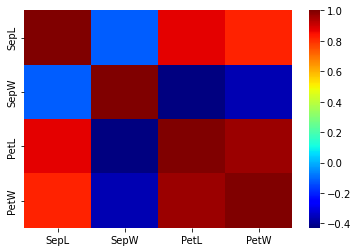

In [11]:
corr = df.corr()
sns.heatmap(corr, cmap="jet")
print(corr)

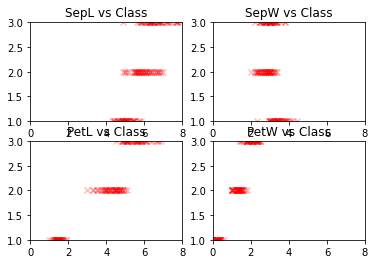

In [12]:
ax1 = plt.subplot(2,2,1)

ax1.set_xlim(left=0, right=8)
ax1.set_ylim(bottom=1, top=3)
plt.title("SepL vs Class")
plt.scatter(df['SepL'], df['Class'],c='red',marker='x',alpha=0.25)

ax2 = plt.subplot(2,2,2, sharex=ax1, sharey=ax1)
plt.scatter(df['SepW'], df['Class'],c='red',marker='x',alpha=0.25)
plt.title("SepW vs Class")

ax3 = plt.subplot(2,2,3, sharex=ax1, sharey=ax1)
plt.scatter(df['PetL'], df['Class'],c='red',marker='x',alpha=0.25)
plt.title("PetL vs Class")

ax4 = plt.subplot(2,2,4, sharex=ax1, sharey=ax1)
plt.scatter(df['PetW'], df['Class'],c='red',marker='x',alpha=0.25)
plt.title("PetW vs Class")
plt.show()